In [2]:
#Primera parte -> Conocer dataset y creacióón de neuronal network
import tensorflow as tf
from tensorflow import keras #Máás adelante lo usaremos
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importaremos la información
fashion_mnist = keras.datasets.fashion_mnist #Es el dataset de ropa xd -> el tíípico es de animales asíí que mejor ropa :v
#Hacemos la misma asignación de siempre
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
#Como observamos tenemos muchas más etiquetas y eso sobre todo porque vamos a clasificar 

In [0]:
train_images.shape
#Son 60000 mil imágenes de una resolucióón de 20 x 20

(60000, 28, 28)

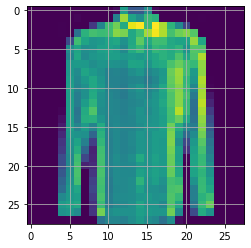

In [0]:
#Visualizar contenido
plt.figure()
plt.imshow(train_images[140])#Pasamos una imagen en concreto
plt.grid(True)


In [0]:
#La red neuronal convolucional va a dividir en secciones de pixeles cada una de las imágenes
#Posterior a ello analizaremos pixel a pixel de cada cuadro
#Mencionar procesamiento de imagen

In [1]:
train_images = train_images / 255.0 
test_images = test_images / 255.0
#Para jalar solo una cierta cantidad

NameError: ignored

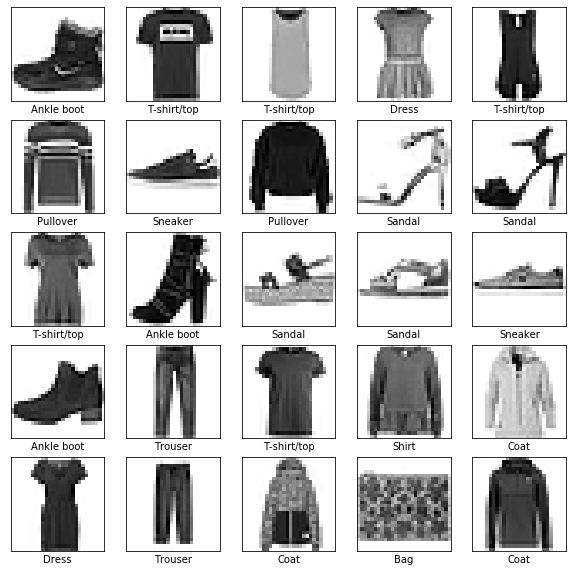

In [0]:
#Visualizar muchos máás datos de nuestro dataset
%matplotlib inline
plt.figure(figsize = (10,10))
for i in range(25):
  #Recorrido
  plt.subplot(5,5,i+1)#Grafica de 5 x 5 e ir recorriendo de a uno
  plt.xticks([])
  plt.yticks([])
  
  #Solo mostraremos info no queremos el grid
  plt.grid('off')

  #Recorrido de los datos / cmap es que tipo de datos graficaremos
  plt.imshow(train_images[i], cmap= plt.cm.binary)
  #Mostraremos la etiqueta de cada una de las imagenes
  plt.xlabel(class_names[train_labels[i]])

In [0]:
#Definir el modelo

model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)), 
                          keras.layers.Dense(128, activation= tf.nn.relu),
                          keras.layers.Dense(10, activation= tf.nn.softmax)
])#Serán las capas de nuestra red neuronal

#el primero es para la forma de nuestros datos
#El segundo es activar la funcion relu 
#El tercero es para crear otra capa que se encargará para aprender un poco más 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer= tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
              )
#Compilar el modelo -> spoiler a bajo nivel está en C++ por eso se compila 
#Optimizador será para reducir tiempos y recursos de la pc 
#la divisióón de las etapas es mediante el loss
#Para asignar la metrica o evaluación de quéé tan bien estáá clasificando por ende ponemos el accuracy

In [0]:
#Entrenar nuestro modelo

model.fit(train_images,train_labels, epochs=5)
#Debido a que tenemos un conjunto grande, debemos dividir por fragmentos 
#Epochs es la cantidad de iteración que haremos sobre la data
#Por lo tanto mientras más grande la data debe ser mayor el epochs
#Aquíí veremos que tardaráá debido a que dividiráá los datos y poco a poco va a agrupar 

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5006 - acc: 0.8232
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3764 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3369 - acc: 0.8772
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3124 - acc: 0.8845
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2931 - acc: 0.8940


In [0]:
#Vamos a evaluar el modelo para saer quéé tan bien estáá entrenado :D
test_loss , test_acc = model.evaluate(test_images,test_labels)
print('Accuracy',test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3519 - acc: 0.8777
Accuracy 0.8777


In [0]:
#Haremos la predicción 
predictions = model.predict(test_images)

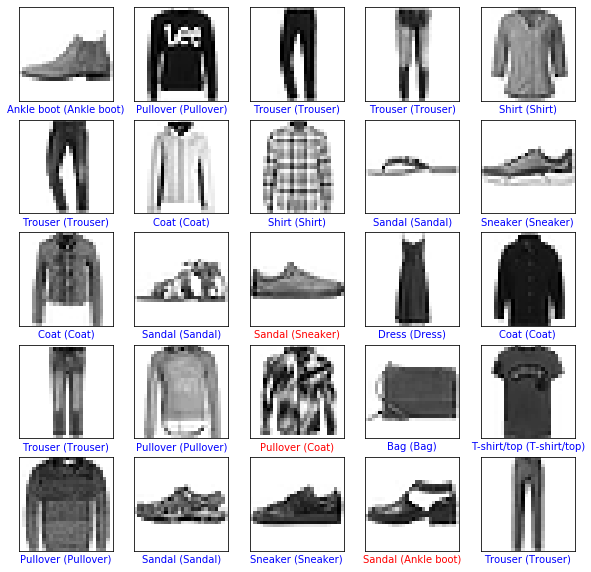

In [0]:
#Vamos a ver que tan bien lo divide
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  #Parte visual 
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap= plt.cm.binary)
  #La asignacióón de las etiquetas
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i] 
  
  #Aquí veremos si lo hizo bien o no
  if predicted_label == true_label:
    color = 'blue'
  else:  
    color = 'red'

  #Vamos a imprimir -> Primero la etiqueta predicha , etiqueta real y el color (Para forma visual)
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)
  #NOTA: El valor entre parentesis es el que será el verdadero
